# Single Layer Feedforward Neural Network #


In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import t3utils as t3

%matplotlib inline

## A. Preparing the dataset ##

First, I'll generate a dataset to work on. The following code will create a 2-class planar dataset with the same interface used in our previous tutorial. It uses a parametric equation to create a 6 petal spirograph split into two classes. The feature dimension is 2 as opposed to $N\times N\times 3$ in our previous image dataset. Therefore data can be conveniently mapped to coordinates in cartesian plane. Evaluate the following cells to generate both training and test data.


In [2]:
def load_dataset():
    """
    create dataset
    
    Returns:
    (X_train, Y_train), (X_test, Y_test), classes -- training and test data
    """
    
    np.random.seed(2019) # for reproducibility
    n = 256
    X = np.zeros((2*n,2))
    Y = np.zeros((2*n,1), dtype='uint8')
    classes = ['red', 'blue']

    for k in range(2):
        i = range(k*n, (k+1)*n)
        Y[i, 0] = k
        # spirograph data points
        theta = np.linspace(k*np.pi, 2*(k+1)*np.pi, n)
        rho = np.sin(3*(theta+k*np.pi)) + np.random.randn(n) * 0.1
        X[i] = np.c_[rho*np.sin(theta), rho*np.cos(theta)]
    
    
    index = np.random.choice(2*n, size=int(0.05 * 2*n), replace=False)    
    Y_s = Y[index, 0]
    np.random.shuffle(Y_s)
    Y[index, 0] = Y_s
    
    X_train = np.concatenate((X[0:int(n/2),:], X[n:3*int(n/2),:]))
    X_test = np.concatenate((X[int(n/2):n,:], X[3*int(n/2):2*n,:]))
    Y_train = np.concatenate((Y[0:int(n/2),:], Y[n:3*int(n/2),:]))
    Y_test = np.concatenate((Y[int(n/2):n,:], Y[3*int(n/2):2*n,:]))
                             
    return (X_train, Y_train), (X_test, Y_test), classes

training set: 256 images
test set: 256 images
features per sample: 2 scalars


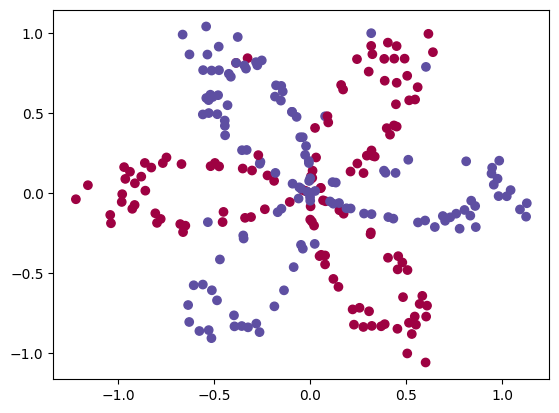

In [3]:
(X_train, Y_train), (X_test, Y_test), classes = load_dataset()

n_train = X_train.shape[0]
n_test = X_test.shape[0]
feature_count = X_test.shape[1]

print("training set: {} images".format(n_train))
print("test set: {} images".format(n_test))
print("features per sample: {} scalars".format(feature_count))
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test.reshape(-1), cmap=plt.cm.Spectral);
plt.show()

In [4]:
def plot_model(model, X, Y):
    range0 = np.arange(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 0.05)
    range1 = np.arange(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 0.05)
    XX, YY = np.meshgrid(range0, range1)
    Y_hat = model(np.c_[XX.ravel(), YY.ravel()])
    Y_hat = Y_hat.reshape(XX.shape)
    plt.contourf(XX, YY, Y_hat, cmap=plt.cm.Spectral)
    plt.ylabel('$x_2$')
    plt.xlabel('$x_1$')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

model accuracy (training) = 50.8%
testing model (test)= 49.2%


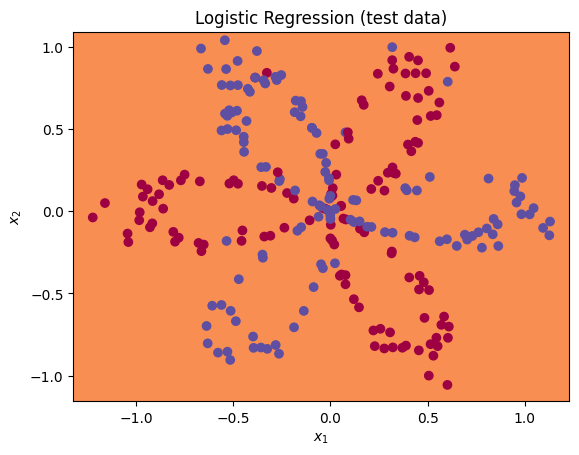

In [6]:
# Define and train Logistic regression model
model = sklearn.linear_model.LogisticRegressionCV(cv=3);
model.fit(X_train, Y_train.ravel());
# Visualise class regions and decision boundaries
plot_model(lambda x: model.predict(x), X_test, Y_test.reshape(-1))
plt.title("Logistic Regression (test data)")

# Report model performance on training and test data
Y_hat_train = model.predict(X_train).reshape(Y_train.shape)
Y_hat_test = model.predict(X_test).reshape(Y_test.shape)
n_train = Y_train.shape[0]
n_test = Y_test.shape[0]

train_acc = np.mean(Y_train == Y_hat_train)*100
test_acc = np.mean(Y_test == Y_hat_test)*100

print("model accuracy (training) = {:.1f}%".format(train_acc))
print("testing model (test)= {:.1f}%".format(test_acc))

In [7]:
def model_config(X, Y, hidden_units=3):
    """
    Arguments:
    X -- n data samples, shape = (n, n_x)
    Y -- ground truth label, column vector of shape (n, 1)
    
    Returns:
    n_x -- number of units in the input layer
    n_y -- number of units in the output layer
    n_h -- number of units in the hidden layer
    """
    
    n_x = X.shape[1]
    n_h = hidden_units
    n_y = 1 #because of a binary output
    
    assert(X.shape[0] == Y.shape[0])
    return (n_x, n_y, n_h)

In [8]:
X, Y, hidden_units = t3.model_config_test()
(n_x, n_y, n_h) = model_config(X, Y, hidden_units)

print("{} input units".format(n_x))
print("{} output unit".format(n_y))
print("{} hidden units".format(n_h))

2 input units
1 output unit
8 hidden units


In [9]:
# Model parameter initialisation
def init_model_parameters(n_x, n_y, n_h):
    """
    n_x -- number of units in the input layer
    n_y -- number of units in the output layer
    n_h -- number of units in the hidden layer
    
    Returns: dictionary containing your parameters:
        W1 -- initialised weight matrix of shape (n_x, n_h)
        b1 -- initialised bias vector of shape (1, n_h)
        W2 -- initialised weight matrix of shape (n_h, n_y)
        b2 -- initialised bias vector of shape (1, n_y)
    """
    
    W1 = np.random.randn(n_x, n_h)*0.01
    b1 = np.zeros((1,n_h))
    W2 = np.random.randn(n_h,n_y)*0.01
    b2 = np.zeros((1,n_y))

    assert(W1.shape == (n_x, n_h))
    assert(b1.shape == (1, n_h))
    assert(W2.shape == (n_h, n_y))
    assert(b2.shape == (1, n_y))
    
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [10]:
np.random.seed(2019)
params = init_model_parameters(n_x=2, n_y=1, n_h=3)
np.set_printoptions(precision=5, suppress=True)
print("W1 = {}".format(params["W1"]))
print("b1 = {}".format(params["b1"]))
print("W2.T = {}".format(params["W2"].T))
print("b2 = {}".format(params["b2"]))

W1 = [[-0.00218  0.00821  0.01481]
 [ 0.01332 -0.00362  0.00686]]
b1 = [[0. 0. 0.]]
W2.T = [[ 0.00574  0.00288 -0.00236]]
b2 = [[0.]]


In [11]:
# Forward propagation (inference)
def forward_prop(params, X, Y=None):
    """
    Compute the layer activations and loss if needed

    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h)
        b1 -- initialised bias vector of shape (1, n_h)
        W2 -- initialised weight matrix of shape (n_h, n_y)
        b2 -- initialised bias vector of shape (1, n_y)
    X -- n data samples, shape = (n, n_x)
    Y -- optional argument, ground truth label, column vector of shape (n, 1)

    Returns:
    loss -- cross-entropy loss or NaN if Y=None
    cache -- a dictionary containing "Z1", "A1", "Z2", A2"
        Z1 -- matrix of shape (n, n_h)
        A1 -- matrix of shape (n, n_h)
        Z2 -- matrix of shape (n, n_y)
        A2 -- matrix of shape (n, n_y)
    """
    
    
    n = X.shape[0]
    
    # Retrieve model parameters
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Forward prop: compute cache from X
    Z1 = np.dot(X, W1)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2)+b2
    A2 = t3.sigmoid(Z2)
    
    n_x = params["W1"].shape[0]
    n_y = params["W2"].shape[1]
    n_h = params["W1"].shape[1]
    assert(A1.shape == (n, n_h))
    assert(Z1.shape == (n, n_h))
    assert(A2.shape == (n, n_y))
    assert(Z2.shape == (n, n_y))
    
    loss = float('nan')
    if Y is not None:
        Y_hat = A2
        # Compute the cross-entropy loss
        loss = -(1/n)*np.sum(Y*np.log(Y_hat+1e-15)+(1-Y)*np.log(1-Y_hat+1e-15))

        loss = np.squeeze(loss)
        assert(loss.dtype == float)
        
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}, loss

In [12]:
params, X, Y = t3.forward_prop_test()
cache, loss = forward_prop(params, X, Y)

print("np.mean(Z1) = {:.5f}".format(np.mean(cache["Z1"])))
print("np.mean(A1) = {:.5f}".format(np.mean(cache["A1"])))
print("np.mean(Z2) = {:.5f}".format(np.mean(cache["Z2"])))
print("np.mean(A2) = {:.5f}".format(np.mean(cache["A2"])))
print("loss = {:.5f}".format(loss))

np.mean(Z1) = -0.04107
np.mean(A1) = 0.03057
np.mean(Z2) = -1.80453
np.mean(A2) = 0.15003
loss = 1.26159


In [25]:
# Backward_propagation
def back_prop(params, X, Y, cache):
    """
    Compute back-propagation gradients
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h)
        b1 -- initialised bias vector of shape (1, n_h)
        W2 -- initialised weight matrix of shape (n_h, n_y)
        b2 -- initialised bias vector of shape (1, n_y)
    X -- n data samples, shape = (n, n_x)
    Y -- ground truth label, column vector of shape (n, 1)
    cache -- dictionary containing "Z1", "A1", "Z2", A2"
        Z1 -- matrix of shape (n, n_h)
        A1 -- matrix of shape (n, n_h)
        Z2 -- matrix of shape (n, n_y)
        A2 -- matrix of shape (n, n_y)
    
    Returns:
    grads -- dictionary containing your gradients with respect to all parameters
        dW1 -- weight gradient matrix of shape (n_x, n_h)
        db1 -- bias gradient vector of shape (1, n_h)
        dW2 -- weight gradient matrix of shape (n_h, n_y)
        db2 -- bias gradient vector of shape (1, n_y)
    """
    
    n = X.shape[0]
    
    # Retrieve w1 and w2 weights from params dictionary
    W1 = params["W1"]
    W2 = params["W2"]
        
    # Retrieve A1 and A2 from cache dictionary
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backprop calculation for dw1, db1, dw2, db2
    dZ2 = A2-Y
    dW2 = (1/n)*np.dot(A1.T, dZ2)
    db2 = (1/n)*np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T)*(1-np.power(A1, 2))
    dW1 = (1/n)*np.dot(X.T,dZ1)
    db1 = (1/n)*np.sum(dZ1, axis=0, keepdims=True)
        
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

In [26]:
params, X, Y, cache = t3.back_prop_test()
grads = back_prop(params, X, Y, cache)

print("dW1 = {}".format(grads["dW1"]))
print("db1 = {}".format(grads["db1"]))
print("dW2.T = {}".format(grads["dW2"].T))
print("db2 = {}".format(grads["db2"]))


dW1 = [[ 0.08191  0.03541  0.0049   0.00276 -0.1456 ]
 [-0.12162 -0.12366  0.18207 -0.12262 -0.09771]]
db1 = [-0.17377 -0.15197  0.21951 -0.13308 -0.04902]
dW2.T = [[0.37147 0.27293 0.08623 0.40718 0.38098]]
db2 = [-0.49222]


In [27]:
# Update model parameters
def update_params(params, grads, learning_rate=0.8):
    """
    Updates parameters using the gradient descent
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- weight matrix of shape (n_x, n_h)
        b1 -- bias vector of shape (1, n_h)
        W2 -- weight matrix of shape (n_h, n_y)
        b2 -- bias vector of shape (1, n_y)
    grads -- dictionary containing gradients
        dW1 -- weight gradient matrix of shape (n_x, n_h)
        db1 -- bias gradient vector of shape (1, n_h)
        dW2 -- weight gradient matrix of shape (n_h, n_y)
        db2 -- bias gradient vector of shape (1, n_y)
    learning_rate -- learning rate of the gradient descent (hyper-parameters)

    Returns:
    params -- dictionary containing updated parameters
        W1 -- updated weight matrix of shape (n_x, n_h)
        b1 -- updated bias vector of shape (1, n_h)
        W2 -- updated weight matrix of shape (n_h, n_y)
        b2 -- updated bias vector of shape (1, n_y)
    """

    # Retrieve each parameter from the dictionary "parameters"
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
        
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [28]:
params, grads = t3.update_params_test()
params = update_params(params, grads)

print("W1 = {}".format(params["W1"]))
print("b1 = {}".format(params["b1"]))
print("W2.T = {}".format(params["W2"].T))
print("b2 = {}".format(params["b2"]))

W1 = [[-0.26965  3.38549  0.6373   0.68604 -0.74118]
 [ 0.35687  0.18441  0.71615  0.43549  1.60339]]
b1 = [[-1.32899 -1.20158 -0.15703  0.4257   0.9854 ]]
W2.T = [[ 0.60585  2.20273 -0.38625  0.65574  0.1165 ]]
b2 = [[-0.18005]]


In [29]:
# Parameter optimisation using backprop
def model_fit(params, X, Y, epochs=2000, learning_rate=0.8, verbose=False):
    """
    Optimise model parameters performing gradient descent
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h)
        b1 -- initialised bias vector of shape (1, n_h)
        W2 -- initialised weight matrix of shape (n_h, n_y)
        b2 -- initialised bias vector of shape (1, n_y)
    X -- n data samples  (n, n_x)
    Y -- ground truth label vector of size (n, n_y)
    epochs -- number of iteration updates through dataset
    learning_rate -- learning rate of the gradient descent
    
    Returns:
    params -- dictionary with optimised parameters
    grads -- dictionary with final gradients
    loss_log -- list of loss values for every 1000 updates
    """
    
    loss_log = []
    for i in range(epochs):
        cache, loss = forward_prop(params,X,Y)
        grads = back_prop(params,X,Y,cache)
        params = update_params(params,grads,learning_rate)
        
        # logs
        if i % 1000 == 0:
            loss_log.append(loss.item())
            if verbose:
                print("Loss after {} iterations: {:.3f}".format(i, loss))
     
    return params, grads, loss_log

In [30]:
params, X, Y = t3.forward_prop_test()
params, grads, loss_log = model_fit(params, X, Y, epochs = 2100, verbose=True)

print("W1 = {}".format(params["W1"]))
print("b1 = {}".format(params["b1"]))
print("W2.T = {}".format(params["W2"].T))
print("b2 = {}".format(params["b2"]))

Loss after 0 iterations: 1.262
Loss after 1000 iterations: 0.002
Loss after 2000 iterations: 0.001
W1 = [[ 5.82809 -4.5018   0.15839  0.02176 -0.62088]
 [ 3.95058 -1.81251  2.21641  0.47214  0.75909]]
b1 = [[-1.26981  0.0359  -0.83395 -3.19964  1.01775]]
W2.T = [[ 7.87515 -4.7095   1.23063  0.18959 -0.29637]]
b2 = [[-0.52574]]


In [41]:
# Model inference
def model_predict(params, X):
    '''
    Predict class label using model parameters
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- optimised weight matrix of shape (n_x, n_h)
        b1 -- optimised bias vector of shape (1, n_h)
        W2 -- optimised weight matrix of shape (n_h, n_y)
        b2 -- optimised bias vector of shape (1, n_y)
    X -- n data samples  (n, n_x)
    
    Returns:
    Y_hat -- vector with class predictions for examples in X
    '''
    
    cache, _ = forward_prop(params,X)
    Y_hat = (cache['A2'] > 0.5)*1 # Convert activations to {0,1} predictions
    
    n = X.shape[0]
    assert(Y_hat.shape == (n, 1))    
    return Y_hat

In [42]:
params, X = t3.model_predict_test()
Y_hat = model_predict(params, X)

print("predictions.T = {}".format(Y_hat.T))

predictions.T = [[1 1 0]]


In [47]:
# SLFN model
def slfn_model(X_train, Y_train, X_test, Y_test, hidden_units=3, epochs=10000, learning_rate=0.5):
    '''
    Build, train and evaluate the logistic regression model
    
    Arguments:
    X_train -- training set a numpy array of shape (n_train, n_x)
    Y_train -- training ground truth vector (0=dog, 1=cat) of size (n_train, n_y)
    X_test -- testing set a numpy array of shape (n_test, n_x)
    Y_test -- testing ground truth vector (0=dog, 1=cat) of size (n_test, n_y)
    hidden_units -- number of units in hidden layer
    epochs -- number of iteration updates through dataset for training (hyper-parameters)
    learning_rate -- learning rate of the gradient descent (hyper-parameters)
    
    Returns:
    model -- dictionary 
        PARAMS -- parameters
        LOSS -- log of training loss
        GRADS -- final 
        ACC -- array with training and testing accuracies
        LR -- learning rate
    '''
    
    (n_x, n_y, n_h) = model_config(X_train,Y_train,hidden_units)
    params = init_model_parameters(n_x, n_y, n_h)
    params, grads, loss = model_fit(params,X_train,Y_train,epochs,learning_rate)
    Y_hat_train = model_predict(params, X_train)
    Y_hat_test = model_predict(params, X_test)
    train_acc = np.mean(Y_hat_train==Y_train)*100
    test_acc = np.mean(Y_hat_test==Y_test)*100

    print("{:.1f}% training acc.".format(train_acc))
    print("{:.1f}% test acc.".format(test_acc))
        
    return {"PARAMS": params, "LOSS": loss, "GRADS": grads, "ACC": [train_acc, test_acc], "LR": learning_rate}

94.5% training acc.
91.0% test acc.


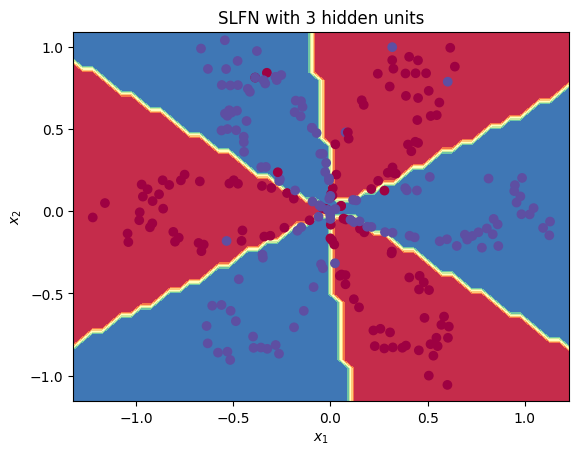

In [48]:
model = slfn_model(X_train, Y_train, X_test, Y_test)
params = model["PARAMS"]

# Plot the decision boundary
plot_model(lambda x: model_predict(params, x), X_test, Y_test.reshape(-1))
_ = plt.title("SLFN with {} hidden units".format(params["W1"].shape[1]))

SLFN with 1 hidden units
69.1% training acc.
59.0% test acc.
SLFN with 2 hidden units
67.2% training acc.
58.6% test acc.
SLFN with 3 hidden units
94.5% training acc.
91.0% test acc.
SLFN with 4 hidden units
93.4% training acc.
88.3% test acc.
SLFN with 8 hidden units
94.1% training acc.
89.1% test acc.
SLFN with 16 hidden units
94.5% training acc.
91.4% test acc.


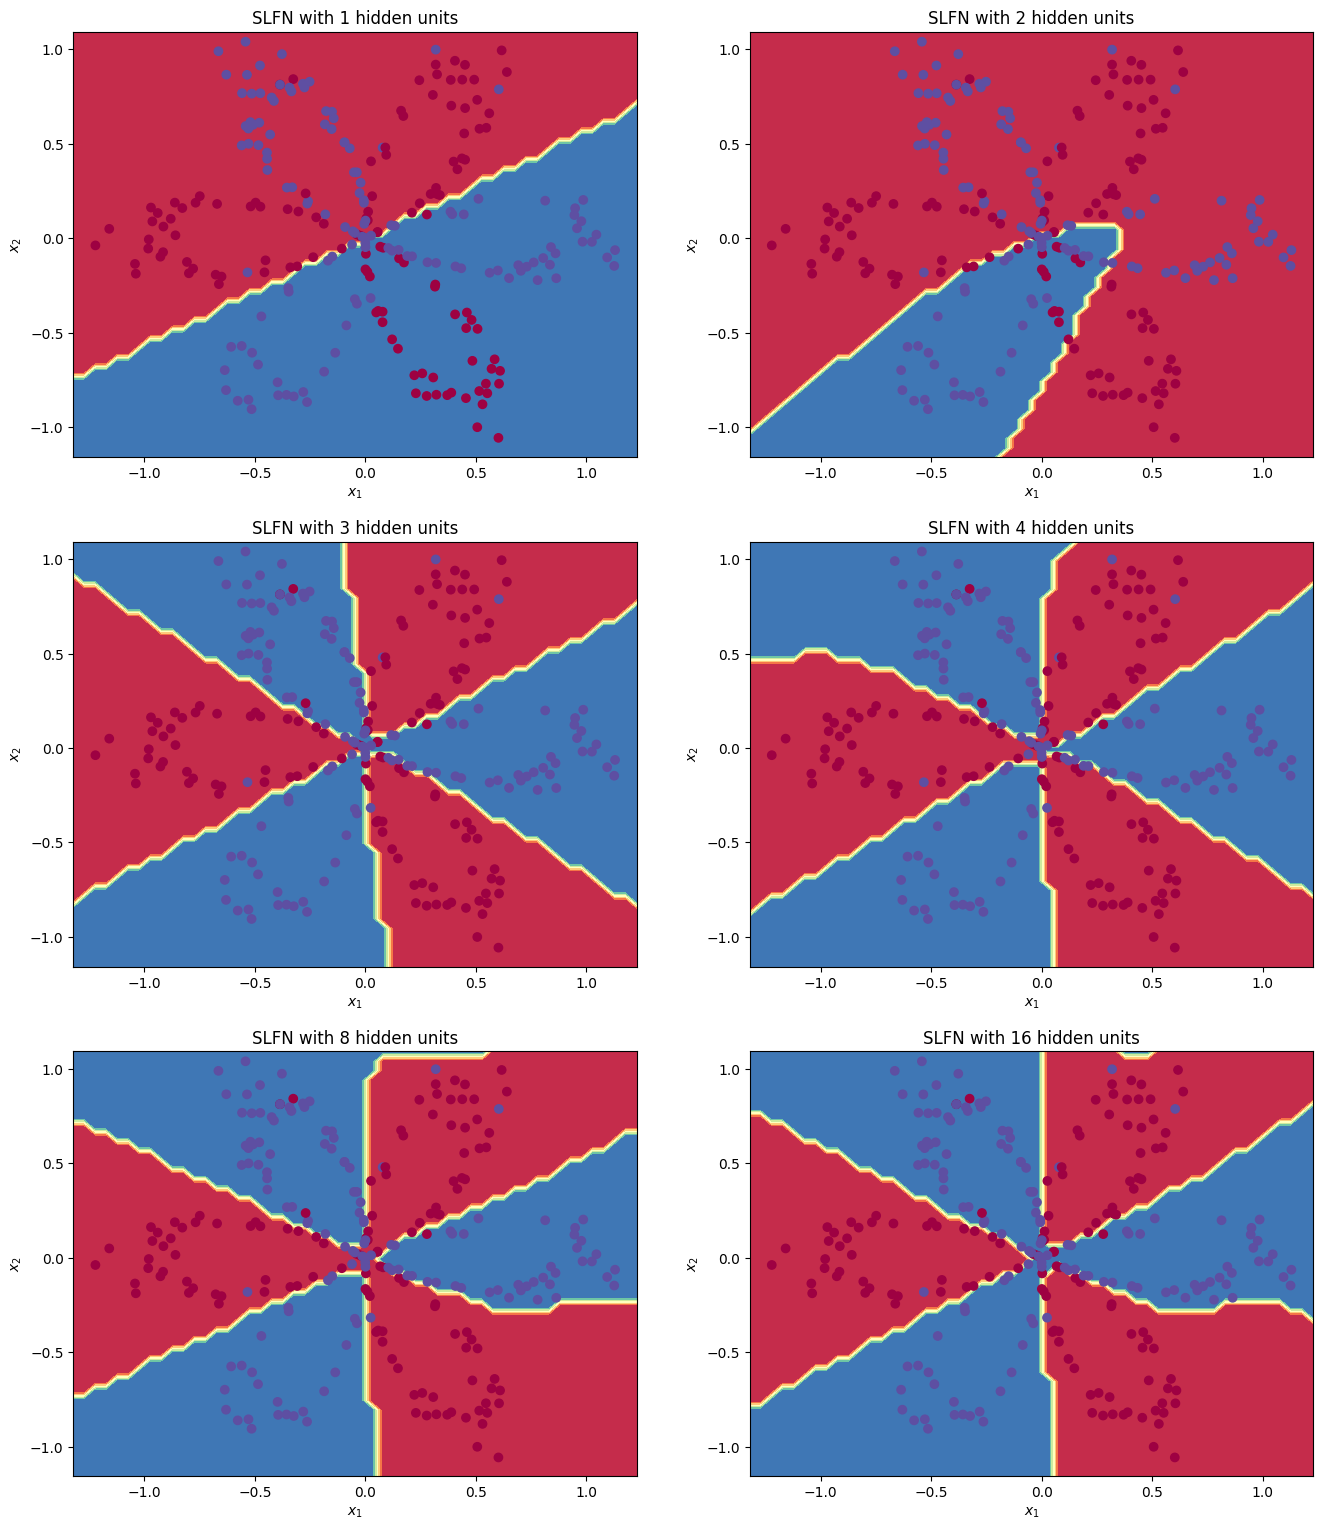

In [49]:
plt.figure(figsize=(16, 32))
for i, hidden_units in enumerate([1, 2, 3, 4, 8, 16]):
    print("SLFN with {} hidden units".format(hidden_units))
    model = slfn_model(X_train, Y_train, X_test, Y_test, hidden_units)
    params = model["PARAMS"]
    plt.subplot(5, 2, i+1)
    plot_model(lambda x: model_predict(params, x), X_test, Y_test.reshape(-1))
    _ = plt.title("SLFN with {} hidden units".format(hidden_units))

- Larger models with more hidden units are able to fit the training better but eventually the largest models overfit the data (training accuracy still going up while testing accuracy starts decreasing)
- It is possible to use larger models and prevent overfitting with a technique called regularisation.
- For our datasets, the best hidden layer size appears to be around 3 hidden units with little noticeable overfitting.

***

Scikit provides a few 2D datasets that you may want to experiment with.


/tmp/ipykernel_576/1063411131.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.random.randint(len(datasets), size=1))


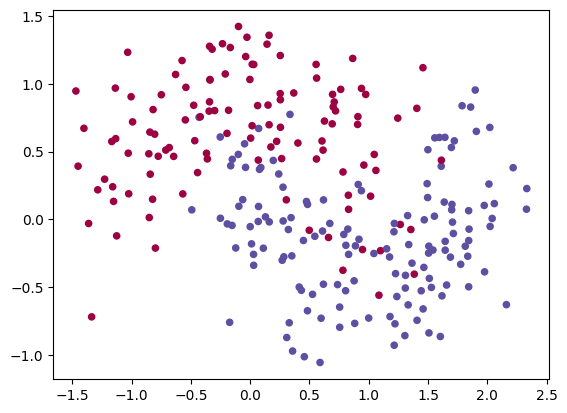

In [50]:
datasets = [sklearn.datasets.make_circles(n_samples=512, factor=.5, noise=.1), 
            sklearn.datasets.make_moons(n_samples=512, noise=.3),
            sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.3, n_samples=512, n_features=2, n_classes=2, shuffle=True, random_state=None)]
index = int(np.random.randint(len(datasets), size=1))
X, Y = datasets[index]
Y = Y.reshape(Y.shape[0], 1)
X_train= X[0:256, :]
X_test= X[256:512, :]
Y_train= Y[0:256, :]
Y_test= Y[256:512, :]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.reshape(-1), s=20, cmap=plt.cm.Spectral);

91.8% training acc.
91.0% test acc.


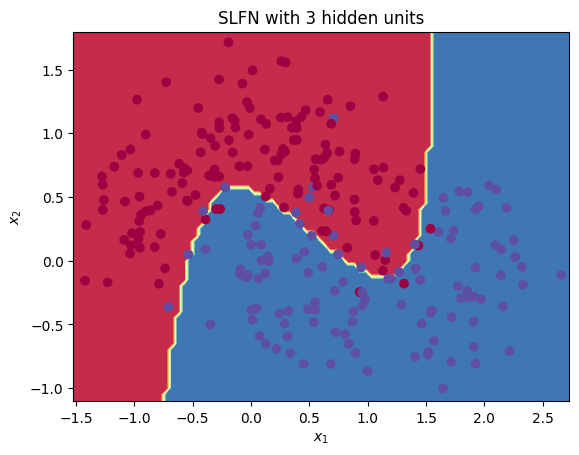

In [51]:
model = slfn_model(X_train, Y_train, X_test, Y_test)
params = model["PARAMS"]

# Plot the decision boundary
plot_model(lambda x: model_predict(params, x), X_test, Y_test.reshape(-1))
_ = plt.title("SLFN with {} hidden units".format(params["W1"].shape[1]))